In [1]:
from libs.edgelistParser import edgelistParser
from libs.utils import list2matrix, getInOutDegree
from libs.page_rank import approximateSimrank, localPageRank
from libs.plotNetwork import plotNetworkClusters
import numpy as np
from matplotlib import pyplot as plt
import heapq as hq
import networkx as nx

In [2]:
# load the Facebook dataset
A, N, D = edgelistParser("datasets/facebook/0.edges", "raw_list")

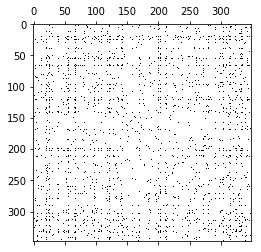

In [3]:
# convert the edge list to a dense matrix
A_mat = list2matrix(A)
plt.figure()
plt.spy(A_mat)
plt.show()

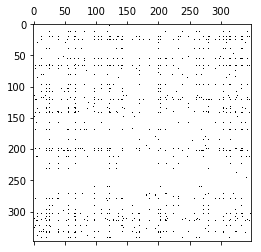

In [4]:
# generate the L matrix
L = localPageRank(A, c=0.85, use_only_neighbours=True)
L_mat = list2matrix(L)
plt.figure()
plt.spy(L_mat)
plt.show()

In [5]:
inDeg, outDeg = getInOutDegree(L)
ratio = np.array(inDeg)/np.array(outDeg)
ratio[np.logical_not(np.isfinite(ratio))]=0

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in true_divide
  
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in true_divide
  


[0, 193, 196, 197, 198, 201, 202, 205, 206, 207, 208, 209, 210, 212, 215, 216, 217, 240, 237, 235, 234, 233, 230, 229, 227, 221, 220, 219, 228, 241, 191, 144, 145, 146, 152, 153, 155, 160, 162, 163, 164, 165, 187, 183, 182, 174, 167, 244, 294, 300, 301, 305, 306, 311, 314, 316, 345, 340, 338, 336, 335, 327, 321, 318, 292, 289, 245, 247, 250, 255, 257, 264, 288, 287, 286, 290, 270, 269, 268, 267, 279, 138, 46, 52, 54, 55, 57, 60, 63, 69, 74, 90, 44, 42, 2, 10, 11, 12, 15, 16, 18, 34, 35, 37, 38, 43, 106, 107, 114, 124, 125, 129, 134, 73, 297, 224, 13, 87, 85, 128, 79, 341, 103]


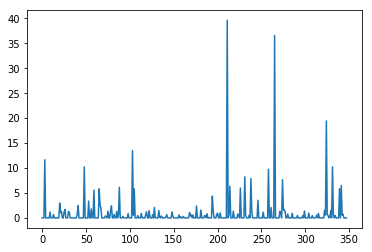

In [13]:
plt.figure()
plt.plot(ratio)
#idxs = np.argwhere(ratio>10).reshape(-1)
#k = 5
#idxs = np.argsort(ratio)[-1:-k-1:-1]

# extract the most probable centroids
#idxs = list(np.argsort(ratio)[::-1])
idxs = list(np.argsort(ratio))
curr_id = 0
while curr_id < len(idxs):
    node = idxs[curr_id]
    neighs = [e[0] for e in A[node]]
    for n in neighs:
        if n in idxs:
            idxs.remove(n)
    curr_id += 1

print(idxs)

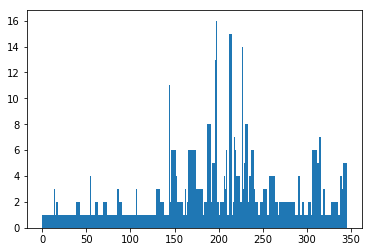

In [17]:
plt.figure()
_ = plt.hist(clusters, bins=np.unique(clusters))